## TASK 3 

In [38]:
# [1] INITIALIZATION CELL
import pandas as pd
import numpy as np
import os
import sys

sys.path.append("../")

from src.functions import *
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet, BayesianRidge

# Seed for reproducibility
np.random.seed(42)

# Reload functions if needed
import importlib
import src.functions as functions
importlib.reload(functions)


dev_df = load_dataset("../data/development_final_data.csv")
val_df = load_dataset("../data/evaluation_final_data.csv")


The metrics on full dataset for the model ElasticNet are
                             train  \
0  (1.0, 0.6537751291833699, 0.0)   

                                                test  
0  (0.9469018915790391, 0.6800269461736461, -0.00...  

The metrics on full dataset for the model SVR are
                                                train  \
0  (0.7575526451952139, 0.3062560859314442, 0.426...   

                                                test  
0  (0.8557279048116951, 0.554216931679972, 0.1823...  

The metrics on full dataset for the model BayesianRidge are
                                                train  \
0  (0.869510765348799, 0.5211433913697989, 0.2439...   

                                                test  
0  (0.8717779945687631, 0.5992333418019856, 0.151...  



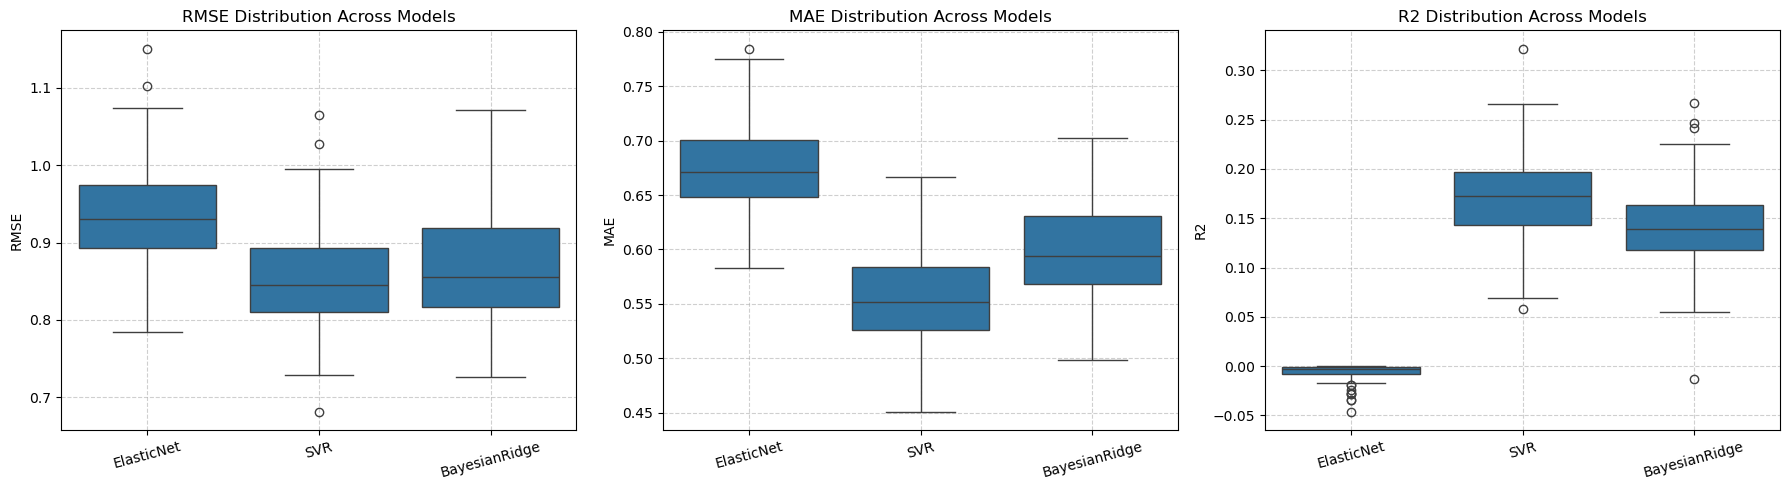

The metrics on full dataset for the model ElasticNet are
                             train  \
0  (1.0, 0.6537751291833699, 0.0)   

                                                test  
0  (0.9469018915790391, 0.6800269461736461, -0.00...  

The metrics on full dataset for the model SVR are
                                                train  \
0  (0.8084876910669129, 0.3629433831402505, 0.346...   

                                                test  
0  (0.8852803537315882, 0.5567935176039824, 0.124...  

The metrics on full dataset for the model BayesianRidge are
                                                train  \
0  (0.8852930840978247, 0.5382834401547336, 0.216...   

                                                test  
0  (0.874600948170105, 0.5930912104241554, 0.1458...  



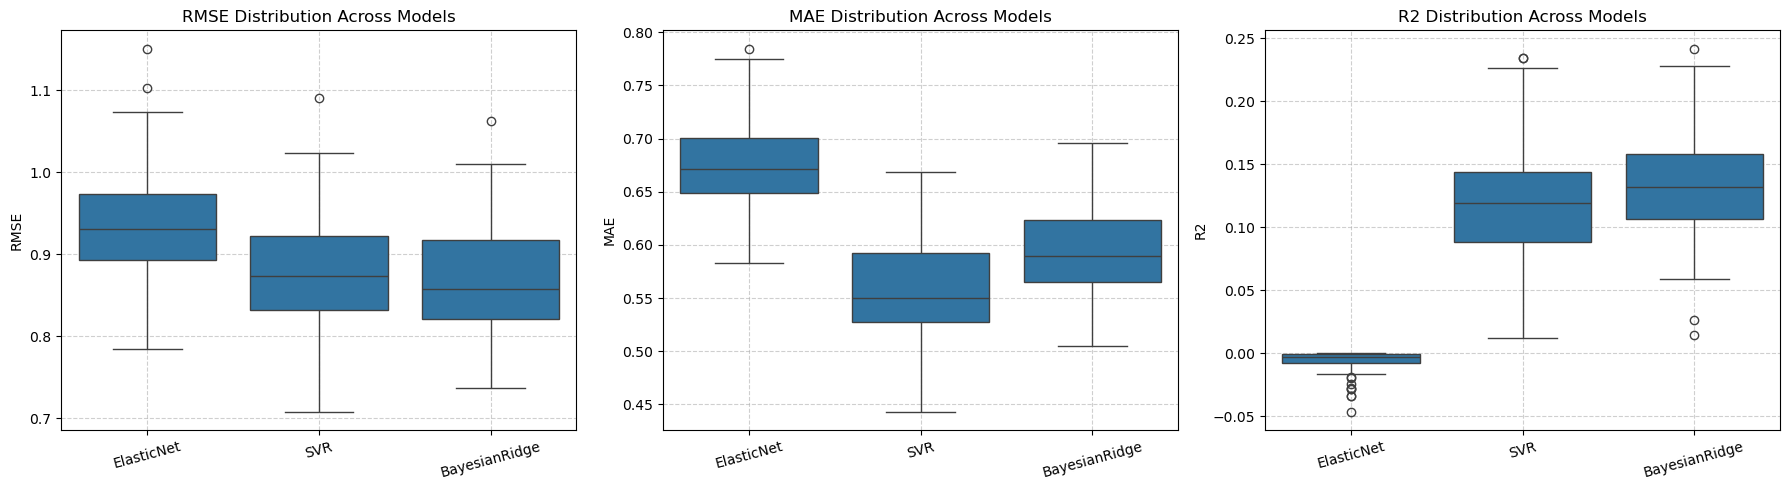

In [43]:
X_dev, y_dev = split_features_target(dev_df, 'BMI')
X_val, y_val = split_features_target(val_df, 'BMI')


os.makedirs("../models", exist_ok=True)
os.makedirs("../final_models", exist_ok=True)


models = {
    'ElasticNet': ElasticNet(),
    'SVR': SVR(),
    'BayesianRidge': BayesianRidge()
}


baseline_scores = {}


for name, model in models.items():

    # 1. Using `train_model` function to train the model
    trained_model = train_model(X_dev, y_dev, model)

    # 2. Using `save_model` function to save the model
    save_model(trained_model, f"../models/{name}_baseline.joblib")

    # 3. Using `evaluate_model` function to evaluate on full evaluation set
    full_metrics = evaluate_model(trained_model, X_dev, y_dev, X_val, y_val)
    print(f"The metrics on full dataset for the model {name} are\n {pd.DataFrame([full_metrics])}\n")

    # 4. Using `bootstrap_evaluation` function to repeat the evaluation multiple times in the eval set
    baseline_scores[name] = bootstrap_evaluation(trained_model, X_val, y_val)
    
    


# Plot results
plot_metrics_boxplot(baseline_scores)


# -----------------------------------------------------------------------------------
filtered_results = {}
selected_features_dict = {}

X_dev_filt, filtered_features = select_features(X_dev, y_dev)
X_val_filt = X_val[filtered_features]

for name, model in models.items():
    selected_features_dict[name] = filtered_features

    trained_model = train_model(X_dev_filt, y_dev, model)
    save_model(trained_model, f"../models/{name}_fs.joblib")

    full_metrics = evaluate_model(trained_model, X_dev_filt, y_dev, X_val_filt, y_val)
    print(f"The metrics on full dataset for the model {name} are\n {pd.DataFrame([full_metrics])}\n")

    # Corrected bootstrap function call
    filtered_results[name] = bootstrap_evaluation(trained_model, X_val_filt, y_val)
   

# Plot results
plot_metrics_boxplot(filtered_results)


## TASK 3.4


Tuning model: ElasticNet
Best params for ElasticNet: {'alpha': 1.0, 'l1_ratio': 0.1, 'max_iter': 1000}
The metrics on full dataset for the model ElasticNet are
                                                train  \
0  (0.9641830543910286, 0.6242802913859901, 0.070...   

                                                test  
0  (0.9254239733934368, 0.6575343645014589, 0.043...  


Tuning model: SVR
Best params for SVR: {'C': 1.0, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
The metrics on full dataset for the model SVR are
                                                train  \
0  (0.8084876910669129, 0.3629433831402505, 0.346...   

                                                test  
0  (0.8852803537315882, 0.5567935176039824, 0.124...  


Tuning model: BayesianRidge
Best params for BayesianRidge: {'alpha_1': 1e-06, 'alpha_2': 1e-05, 'lambda_1': 1e-05, 'lambda_2': 1e-06}
The metrics on full dataset for the model BayesianRidge are
                                          

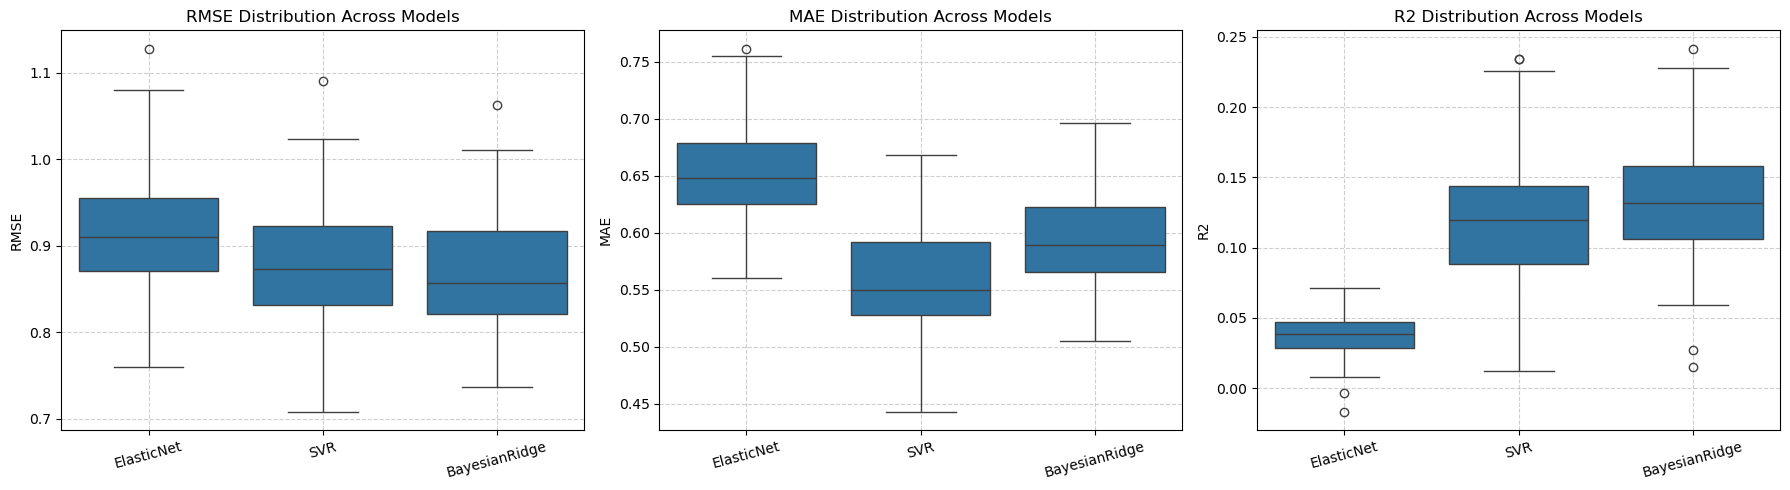

'# Determine and save the best model\nbest_model_name = min(tuning_results, key=lambda x: tuning_results[x][\'RMSE\'][\'mean\'])\nbest_model = all_tuned_models[best_model_name].best_estimator_\n\nsave_model(best_model, f"../final_models/{best_model_name}_best.joblib")\nprint(f"\nBest model is {best_model_name} with RMSE: {tuning_results[best_model_name][\'RMSE\'][\'mean\']:.4f}")\nprint(f"Saved to: ../final_models/{best_model_name}_best.joblib")\n\n# Compare with baseline results if available\nif \'filtered_results\' in locals():\n    print("\n=== Comparison with Feature Selection Baseline ===")\n    comparison_df = pd.concat([\n        pd.DataFrame(filtered_results).T.add_suffix(\'_baseline\'),\n        pd.DataFrame(tuning_results).T.apply(lambda x: x.apply(lambda y: y[\'mean\'])).add_suffix(\'_tuned\')\n    ], axis=1)\n    print(comparison_df)'

In [ ]:
# Define tuned models
models = {
    'ElasticNet': ElasticNet(),
    'SVR': SVR(),
    'BayesianRidge': BayesianRidge()
}

# Define tuning grids
param_grids = {
    'ElasticNet': {
        'alpha': [0.01, 0.1, 1.0, 10.0],
        'l1_ratio': [0.1, 0.5, 0.9],
        'max_iter': [1000]
    },
    'SVR': {
        'C': [0.1, 1.0, 10.0],
        'gamma': ['scale', 'auto'],
        'epsilon': [0.01, 0.1],
        'kernel': ['rbf']
    },
    'BayesianRidge': {
        'alpha_1': [1e-6, 1e-5],
        'alpha_2': [1e-6, 1e-5],
        'lambda_1': [1e-6, 1e-5],
        'lambda_2': [1e-6, 1e-5]
    }
}

# Prepare containers
tuning_results = {}
tuning_scores = {}

# Use same filtered features as before
for name, model in models.items():
    print(f"\nTuning model: {name}")

    # Use already selected features
    selected_feats = selected_features_dict[name]
    X_dev_fs = X_dev[selected_feats]
    X_val_fs = X_val[selected_feats]

    # Tune
    grid_result = tune_model(model, X_dev_fs, y_dev, param_grids[name])
    best_model = grid_result.best_estimator_

    print(f"Best params for {name}: {grid_result.best_params_}")

    # Save tuned model
    save_model(best_model, f"../models/{name}.joblib")

    # Evaluate + Bootstrap
    full_metrics = evaluate_model(best_model, X_dev_fs, y_dev, X_val_fs, y_val)
    print(f"The metrics on full dataset for the model {name} are\n {pd.DataFrame([full_metrics])}\n")

    tuning_scores[name] = bootstrap_evaluation(best_model, X_val_fs, y_val)

# Visualize
plot_metrics_boxplot(tuning_scores)




In [47]:
# Combine RMSE mean scores from all stages
model_versions = ['baseline', 'fs', 'tuned']
regressors = ['ElasticNet', 'SVR', 'BayesianRidge']

# Create a summary table of RMSE means
comparison_dict = {}

for reg in regressors:
    comparison_dict[reg] = {
        'baseline': np.mean(baseline_scores[reg]['RMSE']),
        'fs': np.mean(filtered_results[reg]['RMSE']),
        'tuned': np.mean(tuning_scores[reg]['RMSE'])
    }

# Convert to DataFrame
rmse_comparison_df = pd.DataFrame(comparison_dict).T
rmse_comparison_df.columns = ['Baseline_RMSE', 'FS_RMSE', 'Tuned_RMSE']
print("RMSE mean comparison across all models:\n")
print(rmse_comparison_df)

# Initialize dictionary to store best model paths
best_models = {}

for reg in regressors:
    best_stage = rmse_comparison_df.loc[reg].idxmin()  # get stage with lowest RMSE
    print(f"{reg} best version: {best_stage}")

    # Load corresponding model from saved joblib
    if best_stage == 'Baseline_RMSE':
        best_model = load_model(f"../models/{reg}_baseline.joblib")
    elif best_stage == 'FS_RMSE':
        best_model = load_model(f"../models/{reg}_fs.joblib")
    elif best_stage == 'Tuned_RMSE':
        best_model = load_model(f"../models/{reg}.joblib")  # tuned models saved with just reg name

    # Save into final_models/
    final_path = f"../final_models/{reg}_best.joblib"
    save_model(best_model, final_path)
    best_models[reg] = final_path
    print(f"Saved best {reg} model to: {final_path}")


RMSE mean comparison across all models:

               Baseline_RMSE   FS_RMSE  Tuned_RMSE
ElasticNet          0.938703  0.938703    0.917918
SVR                 0.851810  0.878720    0.878720
BayesianRidge       0.867513  0.870802    0.870802
ElasticNet best version: Tuned_RMSE
Saved best ElasticNet model to: ../final_models/ElasticNet_best.joblib
SVR best version: Baseline_RMSE
Saved best SVR model to: ../final_models/SVR_best.joblib
BayesianRidge best version: Baseline_RMSE
Saved best BayesianRidge model to: ../final_models/BayesianRidge_best.joblib


In [50]:
# Find the best overall model (lowest RMSE mean)
winner_regressor = rmse_comparison_df.mean(axis=1).idxmin()
print(f"\n Best overall model is: {winner_regressor}")



 Best overall model is: BayesianRidge


In [51]:
# Load RAW datasets 
dev_raw = pd.read_csv('../data/assignment1_dev_set.csv')
val_raw = pd.read_csv('../data/assignment1_val_set.csv')

# Drop metadata columns
metadata_cols = ["Project ID", "Experiment type", "Host age", "Sex", "Disease MESH ID"]
dev_raw.drop(columns=metadata_cols, inplace=True)
val_raw.drop(columns=metadata_cols, inplace=True)

# Combine raw datasets
df_all_raw = pd.concat([dev_raw, val_raw], axis=0)

# pipeline
winner_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling the features
])
winner_pipeline.fit(df_all_raw)  # Fit the pipeline on the filtered features


# Split X and y
X_all, y_all = split_features_target(df_all_raw, 'BMI')

# Feature selection
X_all_filt, filtered_features = select_features(X_all, y_all)

# Train best model
best_model = BayesianRidge()
best_model.fit(X_all_filt, y_all)

# Save the final model
save_model(best_model, "../final_models/winner.joblib")